In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
from scipy import stats

import itertools

# data visualization 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = prepare.prep_store()

In [3]:
df['sales_total']  = df.sale_amount * df.item_price

In [4]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,year,quarter,month,day_of_month,day_of_week,weekend,sales_total
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,1,1,0.0,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,2,2,0.0,9.24
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,3,3,0.0,11.76
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,4,4,0.0,10.92
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,5,5,1.0,8.40


In [6]:
df['store_id2'] = 'store_'
df['store_id'] = df.store_id2 + df.store_id.astype(str)
df.drop(columns=['store_id2'], inplace=True)

In [8]:
train = df[:'2016']
test = df['2017':]

In [9]:
train.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,year,quarter,month,day_of_month,day_of_week,weekend,sales_total
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,store_1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,1,1,0.0,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,store_1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,2,2,0.0,9.24
2013-01-03 00:00:00+00:00,1,14.0,3,store_1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,3,3,0.0,11.76
2013-01-04 00:00:00+00:00,1,13.0,4,store_1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,4,4,0.0,10.92
2013-01-05 00:00:00+00:00,1,10.0,5,store_1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,5,5,1.0,8.40


In [ ]:
# sns.lineplot(x=train.day_of_month , y=train.sales_total, hue=train.store_id)


In [ ]:
# sns.lineplot(x=train.month , y=train.sales_total, hue=train.store_id)


In [ ]:
# sns.lineplot(x=train.quarter , y=train.sales_total, hue=train.store_id)


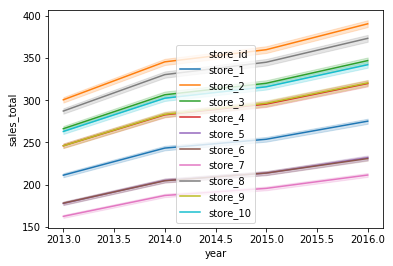

In [10]:
sns.lineplot(x=train.year , y=train.sales_total, hue=train.store_id)


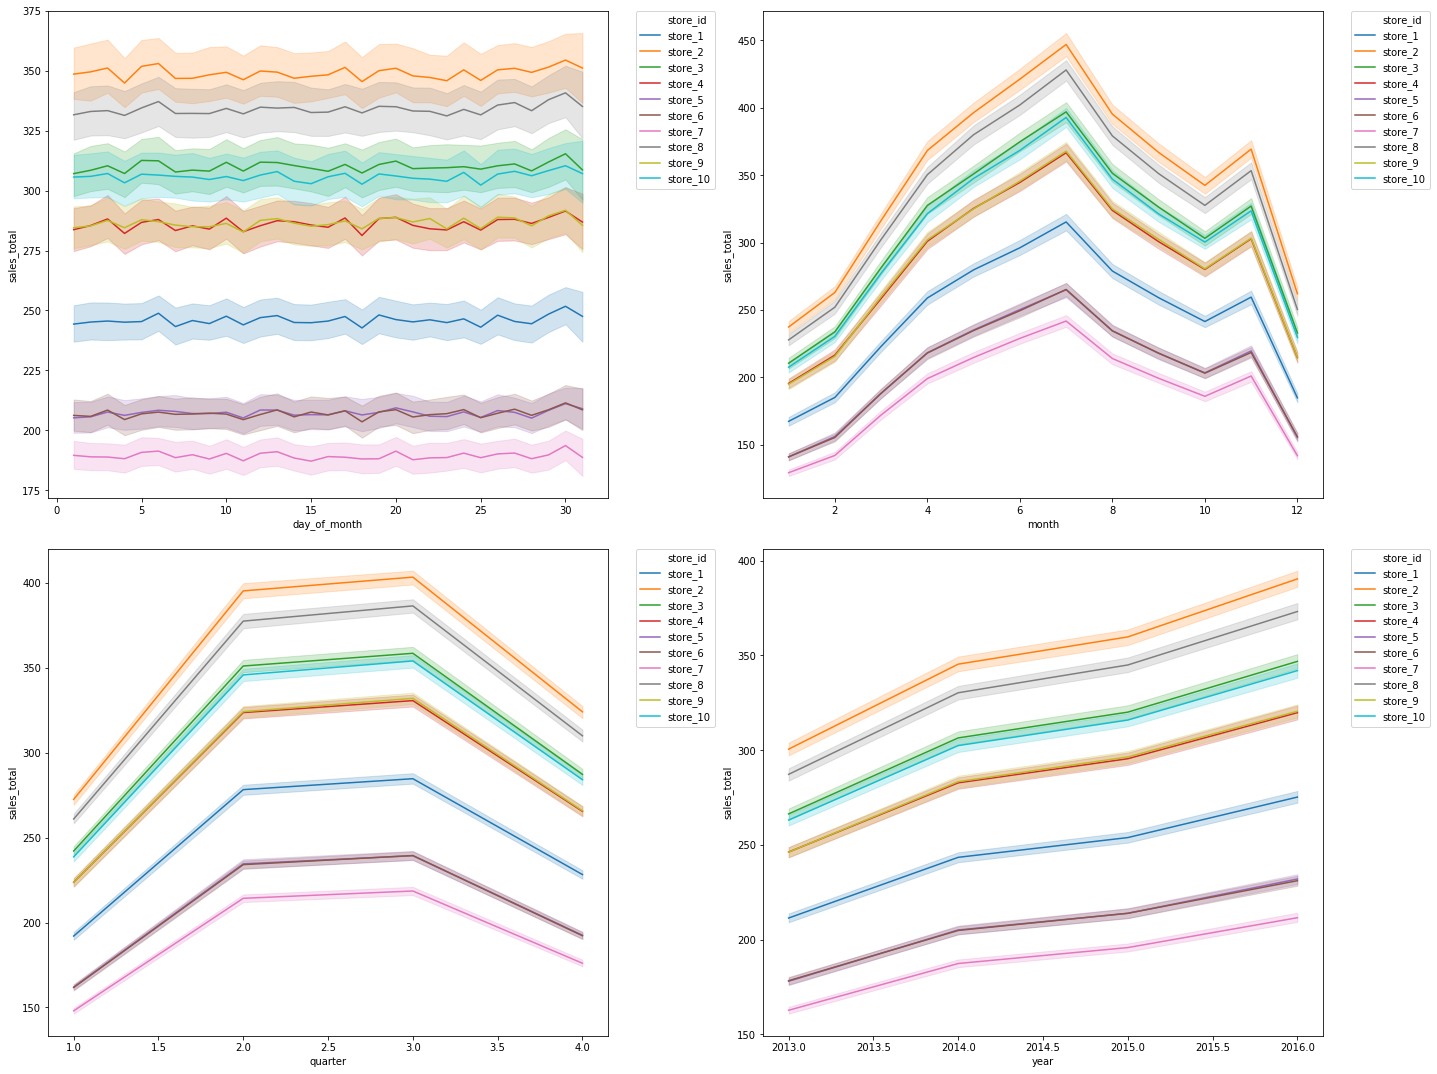

In [11]:
plt.figure(figsize=(20,15))

plt.subplot(221)
sns.lineplot(x=train.day_of_month , y=train.sales_total, hue=train.store_id)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(222)
sns.lineplot(x=train.month , y=train.sales_total, hue=train.store_id)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(223)
sns.lineplot(x=train.quarter , y=train.sales_total, hue=train.store_id)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(224)
sns.lineplot(x=train.year , y=train.sales_total, hue=train.store_id)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout(pad=1, w_pad=1, h_pad=1.5)


In [40]:
sales = train.resample('D').sale_amount.mean()
sales2 = train.groupby('store_id').resample('D').sale_amount.mean()


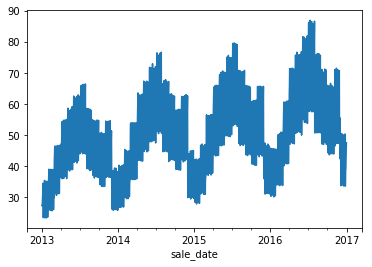

In [24]:
sales.plot()


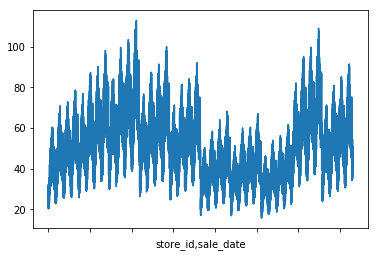

In [41]:
sales2.plot()

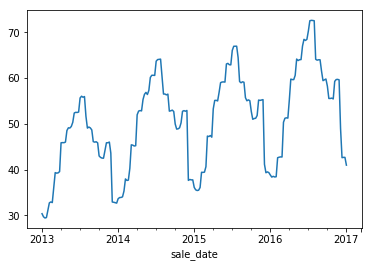

In [25]:
sales.resample('W').mean().plot()


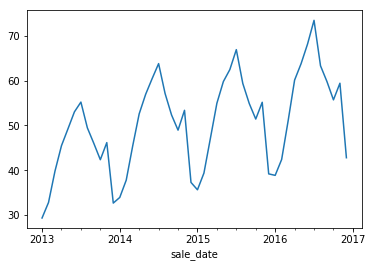

In [31]:
sales.resample('M').mean().plot()


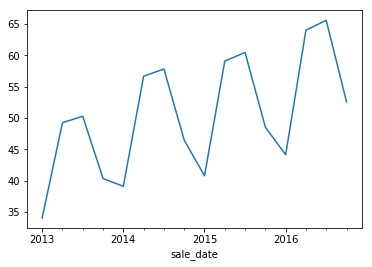

In [27]:
sales.resample('Q').mean().plot()


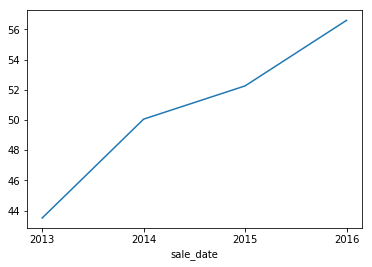

In [32]:
sales.resample('Y').mean().plot()


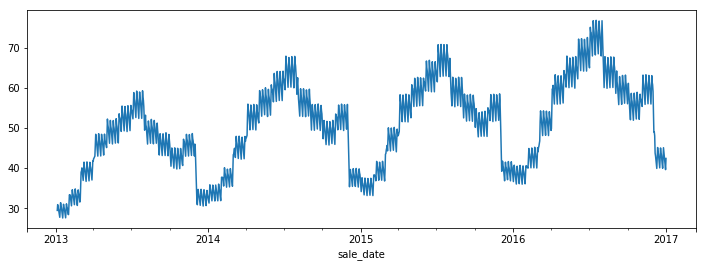

In [39]:
sales.rolling(5).mean().plot(figsize=(12, 4))
